In [12]:
# Breast Cancer Classification Project
# AI in Biology - Jupyter Notebook Scaffold

# -------------------------------
# 1. Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


In [13]:
# -------------------------------
# 2. Load and Inspect Data
# -------------------------------
# Replace with actual path if downloading locally
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ["ID", "Diagnosis"] + [f"feature_{i}" for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)
data.drop("ID", axis=1, inplace=True)

In [14]:
# -------------------------------
# 3. Preprocess Data
# -------------------------------
data["Diagnosis"] = data["Diagnosis"].map({"M": 1, "B": 0})
X = data.drop("Diagnosis", axis=1)
y = data["Diagnosis"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# -------------------------------
# 4. Baseline Model - Logistic Regression
# -------------------------------
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [16]:

# -------------------------------
# 5. Model 2 - Random Forest with Hyperparameter Tuning
# -------------------------------
rf = RandomForestClassifier(random_state=42)
params_rf = {"n_estimators": [50, 100], "max_depth": [None, 10, 20]}
grid_rf = GridSearchCV(rf, params_rf, cv=5)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [17]:
# -------------------------------
# 6. Model 3 - MLP Classifier
# -------------------------------
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("MLP Classifier Report:\n", classification_report(y_test, y_pred_mlp))

MLP Classifier Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



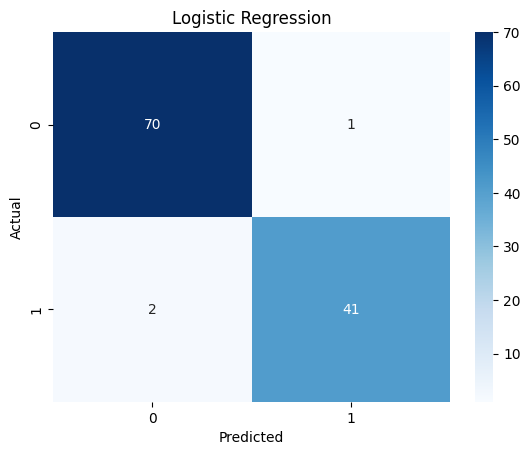

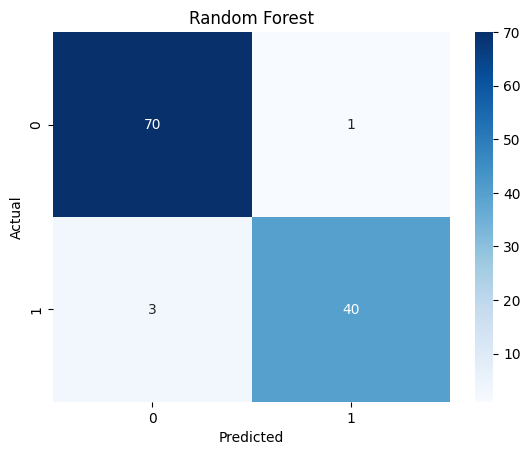

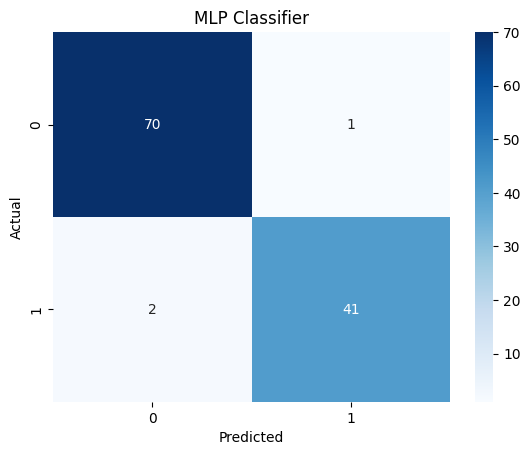

In [18]:
# -------------------------------
# 7. Visualization and Evaluation
# -------------------------------
def plot_confusion(title, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion("Logistic Regression", y_test, y_pred_lr)
plot_confusion("Random Forest", y_test, y_pred_rf)
plot_confusion("MLP Classifier", y_test, y_pred_mlp)

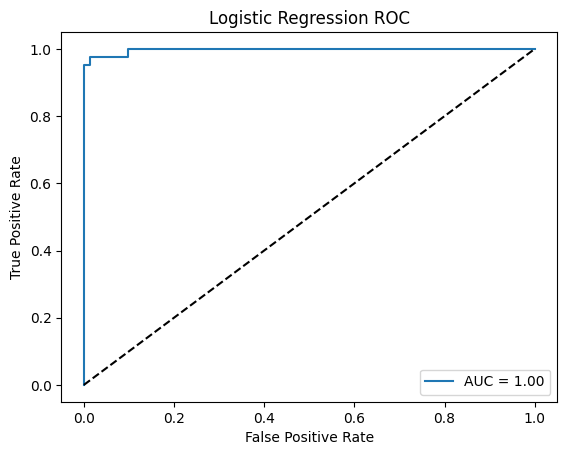

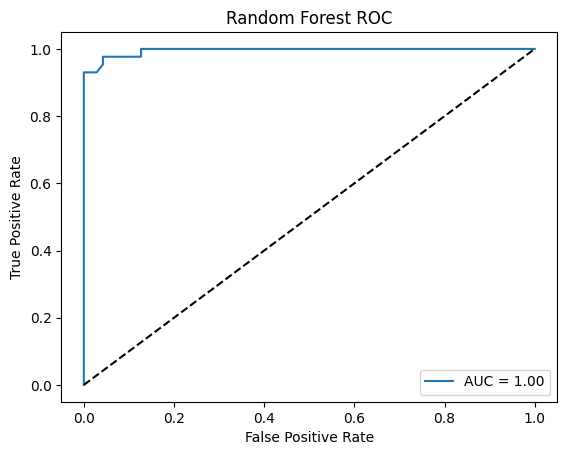

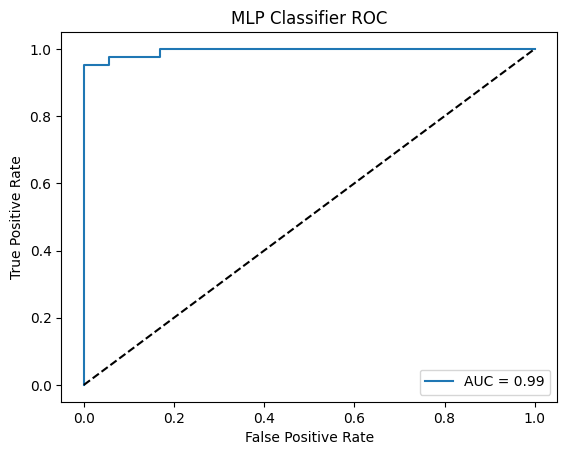

In [19]:
def plot_roc(title, y_true, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    auc_score = roc_auc_score(y_true, y_pred_prob)
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

# Example:
plot_roc("Logistic Regression ROC", y_test, lr.predict_proba(X_test)[:, 1])
plot_roc("Random Forest ROC", y_test, best_rf.predict_proba(X_test)[:, 1])
plot_roc("MLP Classifier ROC", y_test, mlp.predict_proba(X_test)[:, 1])

In [11]:
# -------------------------------
# 8. Discussion
# -------------------------------
# Summarize:
# - Best model and why (e.g., accuracy, recall)
# - Trade-offs between complexity, interpretability
# - Biological implications: importance of minimizing false negatives
# - Limitations: dataset size, lack of biological depth